# load library

In [1]:
import pandas as pd 
import pythainlp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
from pythainlp.corpus.common import thai_stopwords
import warnings
warnings.filterwarnings(action='once')

import numpy as np
from PIL import Image
from wordcloud import WordCloud

from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize

from pythainlp.util import find_keyword
from pythainlp.util import rank 
from pythainlp.tokenize import word_tokenize

import networkx as nx
import matplotlib
import matplotlib.font_manager as fm
fm.fontManager.addfont('THSarabunNew.ttf')
matplotlib.rc('font',family='TH Sarabun New',size =10)


c:\users\tung\research\freelance\shopee_ecommerce\sent_ana\lib\site-packages\wordcloud\wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='c:\\users\\tung\\research\\freelance\\shopee_ecommerce\\sent_ana\\lib\\site-packages\\wordcloud\\stopwords' mode='r' encoding='cp874'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


# import data

In [2]:
df = pd.read_excel('shopee-data_firstbatch.xlsx')
df = df.iloc[:,1:-1]
df.content = df.content.values.astype('U')
df.head()

,ID,keyword,link,name,authur,sell_price,content,timepost,star,shopname,chatrate,Sentiment
0,16340,Vichy Normaderm Phytosolution Daily Care 50 กรัม,https://shopee.co.th/%E0%B8%A7%E0%B8%B4%E0%B8%...,วิชี่ vichy normaderm phytosolution daily care...,b*****o,1092,ส่งเร็วมาก ได้coin ด้วย ดีมากอะ ส่วนเรื่องผลิ...,2021-10-22 07:09,5,vichy_official_shop,100%,1
1,16341,Vichy Normaderm Phytosolution Daily Care 50 กรัม,https://shopee.co.th/%E0%B8%A7%E0%B8%B4%E0%B8%...,วิชี่ vichy normaderm phytosolution daily care...,ongtoey,1092,ปกติเป็นคนหน้ามันมากค่ะ ผิวผสม ก็จะลองไปเรื่อย...,2021-10-21 23:19,5,vichy_official_shop,100%,1
2,16342,Vichy Normaderm Phytosolution Daily Care 50 กรัม,https://shopee.co.th/%E0%B8%A7%E0%B8%B4%E0%B8%...,วิชี่ vichy normaderm phytosolution daily care...,fonnannaphatsone,1092,ได้รับสินค้าครบถ้วนแล้วค่ะ สินค้ามีคุณภาพ คุ้ม...,2021-10-21 16:37,5,vichy_official_shop,100%,1
3,16343,Vichy Normaderm Phytosolution Daily Care 50 กรัม,https://shopee.co.th/%E0%B8%A7%E0%B8%B4%E0%B8%...,วิชี่ vichy normaderm phytosolution daily care...,ameisemod,1092,ตัวนี้ยังไม่เคยใช้ เคยใช้แต่ตัวสเปรย์ลดมันกับ ...,2021-10-19 13:41,5,vichy_official_shop,100%,1
4,16344,Vichy Normaderm Phytosolution Daily Care 50 กรัม,https://shopee.co.th/%E0%B8%A7%E0%B8%B4%E0%B8%...,วิชี่ vichy normaderm phytosolution daily care...,butaoil,1092,ทางร้านจัดส่งรวดเร็วมากค่ะมีความคุ้มค่าคุ้มราค...,2021-10-20 13:56,5,vichy_official_shop,100%,1


# Text preprocessing

In [3]:
def clean_text(txt):
    
    
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    txt = re.sub(r'<.@*?!>','', txt)
    
    # ลบ hashtag
    txt = re.sub(r'#','',txt)

    # ลบ space
    txt = re.sub(r' ','',txt)
    
    #ลบ เลข
    txt = re.sub("(\d)", "",txt)
    
    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        txt = re.sub(r'\{}'.format(c),'',txt)
    
    # ลบ separator เช่น \n \t
    txt = ' '.join(txt.split())
        
    txt = pythainlp.util.normalize(txt)
    return txt

df.content_clean = df.content.apply(clean_text)

<>:14: DeprecationWarning: invalid escape sequence \d
c:\users\tung\research\freelance\shopee_ecommerce\sent_ana\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [4]:
count_vec = CountVectorizer(tokenizer = pythainlp.tokenize.word_tokenize)
cvec = count_vec.fit_transform(df.content_clean)
cvec_df = pd.DataFrame(cvec.toarray())
print(cvec_df.shape)


(5198, 3877)


# Sentiment and star count

In [5]:
sentiment_summary = pd.DataFrame(df.Sentiment.value_counts())
sentiment_summary.index = ['positive','neutral','negative']
sentiment_summary['Sentiment_percentage'] = sentiment_summary.Sentiment/sentiment_summary.Sentiment.sum()
sentiment_summary

,Sentiment,Sentiment_percentage
positive,4290,0.825317
neutral,736,0.141593
negative,172,0.033090


In [6]:
df.groupby(['keyword','Sentiment']).mean()

ID  \
keyword                                            Sentiment                 
Eucerin White Therapy 50 มล.                       1            432.339339   
                                                   2            562.666667   
                                                   3            532.760968   
Olay โอเลย์ รีเจนเนอรีส วิป 50 กรัม                1          57746.089005   
                                                   2          56506.406250   
                                                   3          55542.153846   
Ponds Age Miracle Day Cream 50 g + Ponds Age Mi... 1          10274.848485   
                                                   2          10267.608696   
                                                   3          10215.750000   
SK-II R.N.A. POWER Airy Milky Lotion 80 กรัม       1          16140.146067   
                                                   2          16166.750000   
                                                   3          16181.750000   
Vichy Normaderm Phytosolution Daily Care 50 กรัม   1          16828.480450   
                                                   2          17058.652632   
                                                   3          16833.026316   

                                                               sell_price  \
keyword                                            Sentiment                
Eucerin White Therapy 50 มล.                       1           910.570571   
                                                   2           540.000000   
                                                   3           824.114977   
Olay โอเลย์ รีเจนเนอรีส วิป 50 กรัม                1           111.353927   
                                                   2           166.812500   
                                                   3            85.307692   
Ponds Age Miracle Day Cream 50 g + Ponds Age Mi... 1           949.000000   
                                                   2           949.000000   
                                                   3           949.000000   
SK-II R.N.A. POWER Airy Milky Lotion 80 กรัม       1           870.803371   
                                                   2           881.125000   
                                                   3           759.000000   
Vichy Normaderm Phytosolution Daily Care 50 กรัม   1          1071.117300   
                                                   2          1028.842105   
                                                   3          1052.526316   

                                                                  star  
keyword                                            Sentiment            
Eucerin White Therapy 50 มล.                       1          4.978979  
                                                   2          3.833333  
                                                   3          4.903177  
Olay โอเลย์ รีเจนเนอรีส วิป 50 กรัม                1          4.915183  
                                                   2          3.250000  
                                                   3          4.384615  
Ponds Age Miracle Day Cream 50 g + Ponds Age Mi... 1          4.939394  
                                                   2          3.826087  
                                                   3          4.850000  
SK-II R.N.A. POWER Airy Milky Lotion 80 กรัม       1          4.971910  
                                                   2          3.062500  
                                                   3          4.250000  
Vichy Normaderm Phytosolution Daily Care 50 กรัม   1          4.906802  
                                                   2          3.368421  
                                                   3          4.447368

In [7]:
star_summary = pd.DataFrame(df.star.value_counts())
star_summary.index = ['star 5','star 4','star 3','star 2','star 1']
star_summary['star_percentage'] = star_summary.star/star_summary.star.sum()
star_summary

,star,star_percentage
star 5,4652,0.894960
star 4,439,0.084456
star 3,75,0.014429
star 2,17,0.003270
star 1,15,0.002886


In [8]:
df.groupby(['keyword','star']).mean()

ID  \
keyword                                            star                 
Eucerin White Therapy 50 มล.                       3       597.000000   
                                                   4       564.883333   
                                                   5       494.343716   
Olay โอเลย์ รีเจนเนอรีส วิป 50 กรัม                1     47245.000000   
                                                   2     59685.250000   
                                                   3     55452.000000   
                                                   4     56144.698925   
                                                   5     57906.613303   
Ponds Age Miracle Day Cream 50 g + Ponds Age Mi... 1     10148.000000   
                                                   2     10099.000000   
                                                   3     10351.500000   
                                                   4     10242.469697   
                                                   5     10275.721081   
SK-II R.N.A. POWER Airy Milky Lotion 80 กรัม       1     16124.000000   
                                                   2     16207.000000   
                                                   3     16187.500000   
                                                   4     16164.571429   
                                                   5     16139.531429   
Vichy Normaderm Phytosolution Daily Care 50 กรัม   1     16996.500000   
                                                   2     16999.250000   
                                                   3     16997.000000   
                                                   4     16887.883495   
                                                   5     16828.294118   

                                                          sell_price  \
keyword                                            star                
Eucerin White Therapy 50 มล.                       3      540.000000   
                                                   4      562.500000   
                                                   5      872.814178   
Olay โอเลย์ รีเจนเนอรีส วิป 50 กรัม                1      176.000000   
                                                   2      108.500000   
                                                   3      210.500000   
                                                   4      129.903226   
                                                   5      109.408117   
Ponds Age Miracle Day Cream 50 g + Ponds Age Mi... 1      949.000000   
                                                   2      949.000000   
                                                   3      949.000000   
                                                   4      949.000000   
                                                   5      949.000000   
SK-II R.N.A. POWER Airy Milky Lotion 80 กรัม       1     1057.000000   
                                                   2      648.000000   
                                                   3      894.250000   
                                                   4      797.214286   
                                                   5      876.234286   
Vichy Normaderm Phytosolution Daily Care 50 กรัม   1     1092.000000   
                                                   2     1092.000000   
                                                   3     1023.818182   
                                                   4     1062.873786   
                                                   5     1070.380623   

                                                         Sentiment  
keyword                                            star             
Eucerin White Therapy 50 มล.                       3      2.888889  
                                                   4      2.683333  
                                                   5      2.299678  
Olay โอเลย์ รีเจนเนอรีส วิป 50 กรัม                1      2.000000  
                          

# word count

In [9]:
def get_text_list(message):
  tokenized =[]
  for i in message:
    token = word_tokenize(i)
    for j in token:
      tokenized.append(j)
  
  return tokenized

text_list = get_text_list(df.content_clean)
word_count = pd.DataFrame([find_keyword(text_list, min_len=3)]).T

In [10]:
word_count['word'] = word_count.index
word_count.columns = ['count','word']
word_count.index = range(len(word_count))

In [11]:
word_count.sort_values(by='count',ascending =False,inplace=True)

In [12]:
word_count

,count,word
27,4797,สินค้า
32,4672,ดี
130,3703,กก
1,2446,ดีมาก
30,2089,ราคา
...,...,...
1088,3,Official
1087,3,ยับเยิน
1086,3,สนับสนุน
274,3,ทางการ


In [13]:
word_count.iloc[:20,:]

,count,word
27,4797,สินค้า
32,4672,ดี
130,3703,กก
1,2446,ดีมาก
30,2089,ราคา
133,1905,
31,1570,จัดส่ง
43,1452,ไว
39,1295,ซื้อ
28,1065,คุณภาพ


# word cloud

In [14]:
def get_text_str(message):
  tokenized =" "
  th_stw = thai_stopwords()
  for i in message:
    token = word_tokenize(i)
    for j in token:
      if j not in thai_stopwords():
        tokenized =tokenized + " " + j
  
  return tokenized


text_str = get_text_str(df.content_clean)

In [17]:
path = 'THSarabunNew.ttf'
regexp = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud(
                      font_path=path, 
                      min_font_size=1,
                      background_color="white",
                      width=400,
                      height=200,
                      max_words=1000, 
                      colormap='plasma', 
                      scale=3,
                      font_step=4,
                    #   contour_width=3, 
                      contour_color='steelblue', 
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text_str)

c:\users\tung\research\freelance\shopee_ecommerce\sent_ana\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


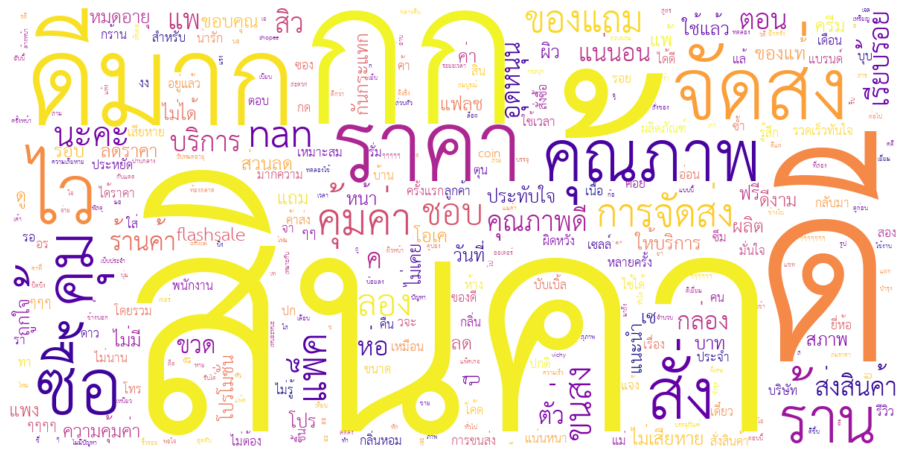

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

# co occurance analysis

In [19]:
import numpy as np
import pandas as pd
from pythainlp.tokenize import word_tokenize

def create_cooccurrence_matrix(sentences, window_size=4):
    """Create co occurrence matrix from given list of sentences.

    Returns:
    - vocabs: dictionary of word counts
    - co_occ_matrix_sparse: sparse co occurrence matrix

    Example:
    ===========
    sentences = ['I love nlp',    'I love to learn',
                 'nlp is future', 'nlp is cool']

    vocabs,co_occ = create_cooccurrence_matrix(sentences)

    df_co_occ  = pd.DataFrame(co_occ.todense(),
                              index=vocabs.keys(),
                              columns = vocabs.keys())

    df_co_occ = df_co_occ.sort_index()[sorted(vocabs.keys())]

    df_co_occ.style.applymap(lambda x: 'color: red' if x>0 else '')

    """
    import scipy
    import nltk

    vocabulary = {}
    data = []
    row = []
    col = []

    tokenizer = word_tokenize
    #tokenizer = nltk.tokenize.word_tokenize

    for sentence in sentences:
        sentence = sentence.strip()
        
        tokens = [token for token in tokenizer(sentence) if token != u""]
        for pos, token in enumerate(tokens):
            i = vocabulary.setdefault(token, len(vocabulary))
            start = max(0, pos-window_size)
            end = min(len(tokens), pos+window_size+1)
            for pos2 in range(start, end):
                if pos2 == pos:
                    continue
                j = vocabulary.setdefault(tokens[pos2], len(vocabulary))
                data.append(1.)
                row.append(i)
                col.append(j)

    cooccurrence_matrix_sparse = scipy.sparse.coo_matrix((data, (row, col)))
    return vocabulary, cooccurrence_matrix_sparse


In [20]:
sentences = df.content_clean
vocabs,co_occ = create_cooccurrence_matrix(sentences)

In [21]:
pd.DataFrame(co_occ.todense())

,0,1,2,3,4,5,6,7,8,9,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922
0,272.0,665.0,721.0,138.0,8.0,62.0,147.0,2.0,7.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,665.0,208.0,474.0,88.0,2.0,30.0,131.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,721.0,474.0,2306.0,190.0,11.0,100.0,443.0,0.0,4.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,138.0,88.0,190.0,50.0,32.0,115.0,88.0,2.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,2.0,11.0,32.0,0.0,17.0,4.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [22]:
df_co_occ  = pd.DataFrame(co_occ.todense(),
                          index=vocabs.keys(),
                          columns = vocabs.keys())

df_co_occ = df_co_occ.sort_index()[sorted(vocabs.keys())]




# visualization for co occ matrix 

In [23]:
def visual_co_occ_matrix(keyword,top_co_occ = 10):
  ### keyword เป็น str ###
  graph = nx.Graph()
  labels_params = {"font_family": "TH Sarabun New",
                 "alpha":1,
                 "font_size":20,
                 "with_labels": True}
  word =[]
  
  for i in df_co_occ.loc[keyword].sort_values(ascending = False).reset_index()['index'][:top_co_occ]:
    if i not in thai_stopwords():
      graph.add_edge(keyword,i)
      word.append(i)
      for j in df_co_occ.loc[i].sort_values(ascending = False).reset_index()['index'][:top_co_occ]:
        if j not in thai_stopwords():
          graph.add_edge(i,j)

  return nx.draw(graph,node_color='#00b4d9', **labels_params)

  

c:\users\tung\research\freelance\shopee_ecommerce\sent_ana\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  alpha=alpha,


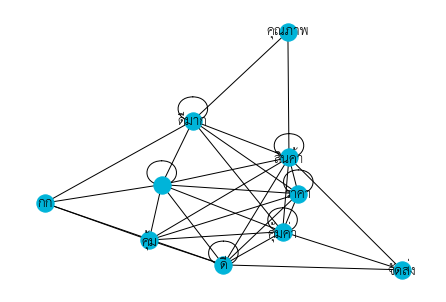

In [24]:
visual_co_occ_matrix('ราคา')


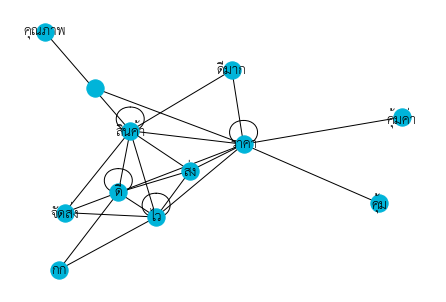

In [25]:
visual_co_occ_matrix('ส่ง')

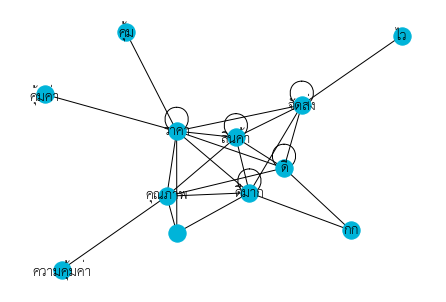

In [26]:
visual_co_occ_matrix('สินค้า')

# Sentiment Star Count 

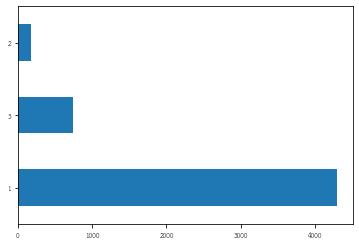

In [27]:
df.Sentiment.value_counts().plot.barh()
plt.show()

In [28]:
sentiment_summary

,Sentiment,Sentiment_percentage
positive,4290,0.825317
neutral,736,0.141593
negative,172,0.033090


In [29]:
df.groupby(['keyword','Sentiment']).mean()

ID  \
keyword                                            Sentiment                 
Eucerin White Therapy 50 มล.                       1            432.339339   
                                                   2            562.666667   
                                                   3            532.760968   
Olay โอเลย์ รีเจนเนอรีส วิป 50 กรัม                1          57746.089005   
                                                   2          56506.406250   
                                                   3          55542.153846   
Ponds Age Miracle Day Cream 50 g + Ponds Age Mi... 1          10274.848485   
                                                   2          10267.608696   
                                                   3          10215.750000   
SK-II R.N.A. POWER Airy Milky Lotion 80 กรัม       1          16140.146067   
                                                   2          16166.750000   
                                                   3          16181.750000   
Vichy Normaderm Phytosolution Daily Care 50 กรัม   1          16828.480450   
                                                   2          17058.652632   
                                                   3          16833.026316   

                                                               sell_price  \
keyword                                            Sentiment                
Eucerin White Therapy 50 มล.                       1           910.570571   
                                                   2           540.000000   
                                                   3           824.114977   
Olay โอเลย์ รีเจนเนอรีส วิป 50 กรัม                1           111.353927   
                                                   2           166.812500   
                                                   3            85.307692   
Ponds Age Miracle Day Cream 50 g + Ponds Age Mi... 1           949.000000   
                                                   2           949.000000   
                                                   3           949.000000   
SK-II R.N.A. POWER Airy Milky Lotion 80 กรัม       1           870.803371   
                                                   2           881.125000   
                                                   3           759.000000   
Vichy Normaderm Phytosolution Daily Care 50 กรัม   1          1071.117300   
                                                   2          1028.842105   
                                                   3          1052.526316   

                                                                  star  
keyword                                            Sentiment            
Eucerin White Therapy 50 มล.                       1          4.978979  
                                                   2          3.833333  
                                                   3          4.903177  
Olay โอเลย์ รีเจนเนอรีส วิป 50 กรัม                1          4.915183  
                                                   2          3.250000  
                                                   3          4.384615  
Ponds Age Miracle Day Cream 50 g + Ponds Age Mi... 1          4.939394  
                                                   2          3.826087  
                                                   3          4.850000  
SK-II R.N.A. POWER Airy Milky Lotion 80 กรัม       1          4.971910  
                                                   2          3.062500  
                                                   3          4.250000  
Vichy Normaderm Phytosolution Daily Care 50 กรัม   1          4.906802  
                                                   2          3.368421  
                                                   3          4.447368

In [30]:
star_summary

,star,star_percentage
star 5,4652,0.894960
star 4,439,0.084456
star 3,75,0.014429
star 2,17,0.003270
star 1,15,0.002886


In [31]:
df.groupby(['keyword','star']).mean()

ID  \
keyword                                            star                 
Eucerin White Therapy 50 มล.                       3       597.000000   
                                                   4       564.883333   
                                                   5       494.343716   
Olay โอเลย์ รีเจนเนอรีส วิป 50 กรัม                1     47245.000000   
                                                   2     59685.250000   
                                                   3     55452.000000   
                                                   4     56144.698925   
                                                   5     57906.613303   
Ponds Age Miracle Day Cream 50 g + Ponds Age Mi... 1     10148.000000   
                                                   2     10099.000000   
                                                   3     10351.500000   
                                                   4     10242.469697   
                                                   5     10275.721081   
SK-II R.N.A. POWER Airy Milky Lotion 80 กรัม       1     16124.000000   
                                                   2     16207.000000   
                                                   3     16187.500000   
                                                   4     16164.571429   
                                                   5     16139.531429   
Vichy Normaderm Phytosolution Daily Care 50 กรัม   1     16996.500000   
                                                   2     16999.250000   
                                                   3     16997.000000   
                                                   4     16887.883495   
                                                   5     16828.294118   

                                                          sell_price  \
keyword                                            star                
Eucerin White Therapy 50 มล.                       3      540.000000   
                                                   4      562.500000   
                                                   5      872.814178   
Olay โอเลย์ รีเจนเนอรีส วิป 50 กรัม                1      176.000000   
                                                   2      108.500000   
                                                   3      210.500000   
                                                   4      129.903226   
                                                   5      109.408117   
Ponds Age Miracle Day Cream 50 g + Ponds Age Mi... 1      949.000000   
                                                   2      949.000000   
                                                   3      949.000000   
                                                   4      949.000000   
                                                   5      949.000000   
SK-II R.N.A. POWER Airy Milky Lotion 80 กรัม       1     1057.000000   
                                                   2      648.000000   
                                                   3      894.250000   
                                                   4      797.214286   
                                                   5      876.234286   
Vichy Normaderm Phytosolution Daily Care 50 กรัม   1     1092.000000   
                                                   2     1092.000000   
                                                   3     1023.818182   
                                                   4     1062.873786   
                                                   5     1070.380623   

                                                         Sentiment  
keyword                                            star             
Eucerin White Therapy 50 มล.                       3      2.888889  
                                                   4      2.683333  
                                                   5      2.299678  
Olay โอเลย์ รีเจนเนอรีส วิป 50 กรัม                1      2.000000  
                          

# Word_count 

In [32]:
word_count

,count,word
27,4797,สินค้า
32,4672,ดี
130,3703,กก
1,2446,ดีมาก
30,2089,ราคา
...,...,...
1088,3,Official
1087,3,ยับเยิน
1086,3,สนับสนุน
274,3,ทางการ


# Top 20 word count

In [33]:
word_count.iloc[:20,:]

,count,word
27,4797,สินค้า
32,4672,ดี
130,3703,กก
1,2446,ดีมาก
30,2089,ราคา
133,1905,
31,1570,จัดส่ง
43,1452,ไว
39,1295,ซื้อ
28,1065,คุณภาพ


# wordcloud

c:\users\tung\research\freelance\shopee_ecommerce\sent_ana\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


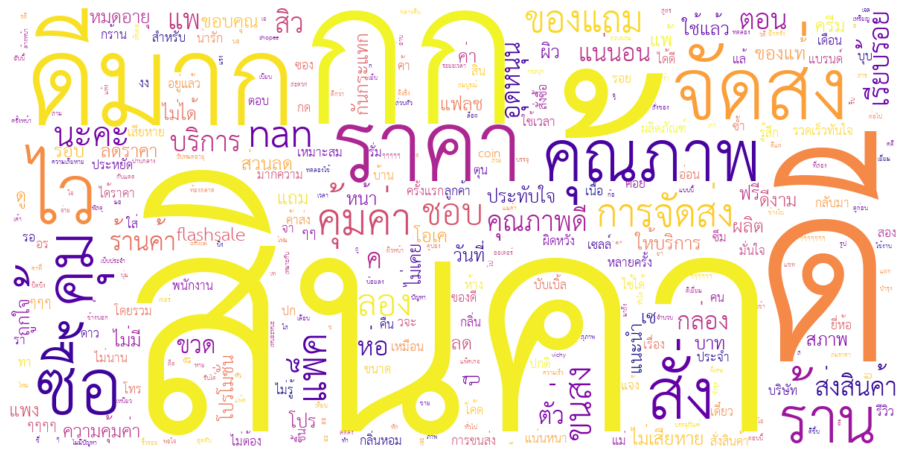

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

# co-occurance analysis

c:\users\tung\research\freelance\shopee_ecommerce\sent_ana\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  alpha=alpha,


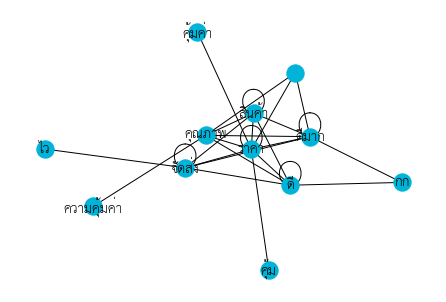

In [35]:
visual_co_occ_matrix('สินค้า')